In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [22]:
# Считываем данные из файла
dataframe = pd.read_excel("train.xlsx")
dataframe.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646.0,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907.0,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909.0,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297.0,2018-12-30,Стандарт,Калиниград,Binders,28781.13


# Задание №1

Выведем некоторый код в отдельные функции, чтобы не дублировать код в дальнейшем

In [60]:
def get_period_data(days: int) -> pd.DataFrame:
    global dataframe
    # Получаем ближайшую к нашей дате дату из датафрейма и приводим ее в удобный для работы формат
    close_date = dataframe.sort_values(by=['Order Date'], ascending=False)[:1]['Order Date'].item()
    close_date = datetime(close_date.year, close_date.month, close_date.day)
    # От ближайшей даты отсчитываем days дней
    delta_date = close_date - timedelta(days=730)
    return dataframe[dataframe['Order Date'] >= delta_date]

def get_top_categories(df: pd.DataFrame, count: int) -> pd.DataFrame:
    return pd.DataFrame(df.groupby(by=['Sub-Category']).sum()['Sales']).sort_values(by=['Sales'],ascending=False)[:count]

а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [61]:
# Суммируем все покупки по всем категориям и сортируем их в порядке убывания
get_top_categories(dataframe, 10)

,Sales
Sub-Category,
Binders,3.391197e+07
Paper,3.069077e+07
Furnishings,2.156507e+07
Phones,2.034327e+07
Storage,1.889280e+07
Art,1.783246e+07
Accessories,1.727495e+07
Chairs,1.412568e+07
Appliances,1.036418e+07


б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [62]:
# Выведем все покупки по всем категориям и сортируем их в порядке убывания за последние 2 года
df = get_period_data(730)
get_top_categories(df, 10)

,Sales
Sub-Category,
Binders,2.047156e+07
Paper,1.913968e+07
Furnishings,1.261281e+07
Phones,1.203552e+07
Storage,1.133849e+07
Accessories,1.025310e+07
Art,1.025160e+07
Chairs,8.134456e+06
Appliances,6.088008e+06


в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [63]:
# Делаем все то же, что и в прошлом пункте, только берем данные за 1 год
df = get_period_data(365)
get_top_categories(df, 10)

,Sales
Sub-Category,
Binders,2.047156e+07
Paper,1.913968e+07
Furnishings,1.261281e+07
Phones,1.203552e+07
Storage,1.133849e+07
Accessories,1.025310e+07
Art,1.025160e+07
Chairs,8.134456e+06
Appliances,6.088008e+06


## Вывод:
Мы можем заметить, что топ 5 категорий по продажам не сдают свои позиции в течении всего времени и в течении последних 2 лет и года. Что интересного мы можем заметить, так это то, что категория Art продается больше чем Accessories в течение всего времени, но в течении последнего года и даже 2 лет, категория Accessories обходит Art по продажам. Можно сказать, что в последнее время они пользуются большим спросом.

# Задание №2

Используем правило трех сигм, чтобы избавиться от выбросов. Оно утверждает, что вероятность того, что случайная величина отклониться от своего матожа на не менее, чем на три среднеквадратических отклонения $\sigma$, не более $\frac{1}{9}$. Т.е. $P(|\xi - M[\xi]| ≥ 3\sigma) ≤ \frac{1}{9}$

In [89]:
# Из курса статистики известно, что матожидание можно оценить средним арифметическим, воспользуемся этим
df = pd.DataFrame(dataframe.groupby(by=['Order Date']).sum()['Sales']).reset_index()
expectation = df['Sales'].mean()
num_of_data = len(df)
# Считаем дисперсию
variance = sum(map(lambda x: (x - expectation)**2, df['Sales'].values) ) / num_of_data
upper_boundary = expectation + variance * 3 # Верхний порог, выше которого нет смысла смотреть
lower_boundary = expectation - variance * 3 # Нижний порог, ниже которого нет смысла смотреть
print(expectation, variance, upper_boundary, lower_boundary)
df = df[(df['Sales'] < upper_boundary) & (df['Sales'] > lower_boundary)]
df

182628.63887642295 21717662677.05729 65153170659.810745 -65152805402.53299


,Order Date,Sales
0,2015-01-03,11726.470
1,2015-01-04,40220.945
2,2015-01-05,8639.472
3,2015-01-06,195371.356
4,2015-01-07,18140.434
...,...,...
1225,2018-12-26,83209.331
1226,2018-12-27,28682.971
1227,2018-12-28,480587.092
1228,2018-12-29,290260.145


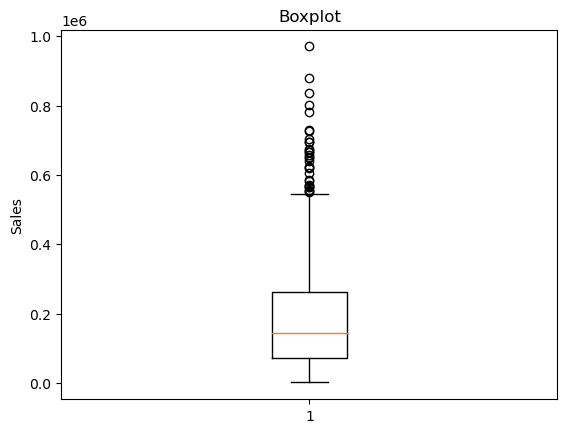

In [93]:
# Начертим график по общим продажам
plt.boxplot(df['Sales'], vert=True)
plt.title('Boxplot')
plt.ylabel('Sales')
plt.show()

Исходя из прошлых данных, было замечено, что дисперсия сильно больше матожидания, из-за чего метод трех сигм будет неуместно здесь использовать, потому что некоторые выбросы останутся в датасете, вместо этого используем метод квантилей

In [112]:
df = pd.DataFrame(dataframe.groupby(by=['Order Date', 'Sub-Category']).sum()['Sales']).reset_index()
categories_names = list(pd.DataFrame(dataframe.groupby(by=['Sub-Category']).sum()).reset_index()['Sub-Category'].values)
# Считаем квантили для каждой категории
q = list()
for i, name in enumerate(categories_names):
    data = df[df['Sub-Category'] == name]
    q_low = data['Sales'].quantile(0.25)
    q_hi = data['Sales'].quantile(0.75)
    q_range = q_hi - q_low
    q.append([q_low, q_hi, q_range])

dfs = list()
for i, name in enumerate(categories_names):
    data = df[(df['Sub-Category'] == name) & (df['Sales'] < q[i][1] + 1.5 * q[i][2]) & (df['Sales'] > q[i][0] - 1.5 * q[i][2])]
    data = data['Sales']
    dfs.append(data)

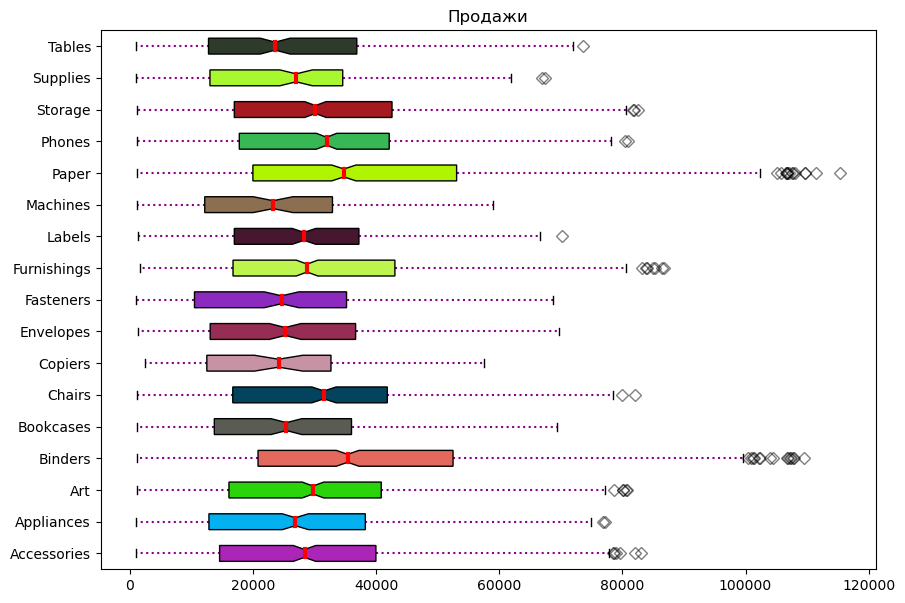

In [113]:
colors = ['#ab26b6', '#04b1f0', '#29d40b', '#e3685e', '#5a5b52', '#04435d', '#c792a4', '#972d54', '#8c29be', '#bdf54e', '#47162f', '#8b6f50', '#aff501', '#38b854', '#a41a20', '#a8f82f', '#2e3b2a']

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(dfs, patch_artist = True,
                 notch ='True', vert = 0)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

ax.set_yticklabels(categories_names)

plt.title("Продажи")

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()

## Вывод:
По графику можно заметить результаты из прошлого задания, какие категории более продаваемые, какие менее, так же было замечено, что после того, как были убраны выбросы медиана сместилась к центру кирпича. Так же по этому графику можно сказать, что товары с наименьшей длинной кирпича покупают чаще в одинаковом количестве

# Задание №3

In [121]:
mid = (dataframe['Sales'].median() - 7500, dataframe['Sales'].median() + 7500)
mid

(15382.060000000001, 30382.06)

In [128]:
# Маленькие продажи < 15382 < средние продажи < 30382 < высокие продажи
df = dataframe
df['Sale_group'] = pd.qcut(df['Sales'], q=3, labels=['Маленькие продажи', 'Средние продажи', 'Высокие продажи'])
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales,Sales-Group,Sale_group
0,646.0,2018-12-30,Стандарт,Урал,Appliances,37229.08,Высокие продажи,Высокие продажи
1,907.0,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,Средние продажи,Средние продажи
2,908.0,2018-12-30,Стандарт,Владивосток,Phones,42133.86,Высокие продажи,Высокие продажи
3,909.0,2018-12-30,Стандарт,Владивосток,Binders,10612.00,Низкие продажи,Маленькие продажи
4,1297.0,2018-12-30,Стандарт,Калиниград,Binders,28781.13,Средние продажи,Средние продажи


In [130]:
df.groupby(by=['Region', 'Sales-Group']).count()['Sales']

Region       Sales-Group    
Владивосток  Высокие продажи     941
             Низкие продажи      927
             Средние продажи     917
Калиниград   Высокие продажи     990
             Низкие продажи     1020
             Средние продажи    1130
Москва       Высокие продажи     529
             Низкие продажи      513
             Средние продажи     556
Урал         Высокие продажи     738
             Низкие продажи      752
             Средние продажи     787
Name: Sales, dtype: int64

In [138]:
categories_sales = df.groupby(by=['Region', 'Sales-Group', 'Sub-Category']).agg({'Sales': ['count', 'sum', 'mean']})
categories_sales.columns = ['Transaction_Count', 'Total_Sales', 'Avg_Sale']
categories_sales.sort_values(by='Total_Sales', ascending=False)

,,,Transaction_Count,Total_Sales,Avg_Sale
Region,Sales-Group,Sub-Category,,,
Владивосток,Высокие продажи,Binders,152,5718030.850,37618.624013
Калиниград,Высокие продажи,Paper,133,4986725.380,37494.175789
Владивосток,Высокие продажи,Paper,130,4948068.960,38062.068923
Калиниград,Высокие продажи,Binders,132,4939354.120,37419.349394
Урал,Высокие продажи,Binders,116,4405809.980,37981.120517
...,...,...,...,...,...
Москва,Низкие продажи,Machines,5,49732.757,9946.551400
Владивосток,Низкие продажи,Copiers,6,38525.503,6420.917167
Урал,Низкие продажи,Copiers,3,33985.784,11328.594667


In [133]:
grouped_sales = df.groupby(by=['Region', 'Sale_group']).agg({'Sales': ['count', 'sum', 'mean']}).reset_index()
grouped_sales.columns = ['Region', 'Sale_group', 'Transaction_Count', 'Total_Sales', 'Avg_Sale']
grouped_sales.sort_values(by='Total_Sales', ascending=False)

,Region,Sale_group,Transaction_Count,Total_Sales,Avg_Sale
5,Калиниград,Высокие продажи,1009,3.790437e+07,37566.277532
2,Владивосток,Высокие продажи,956,3.581224e+07,37460.497312
11,Урал,Высокие продажи,758,2.825832e+07,37280.111082
4,Калиниград,Средние продажи,1093,2.515241e+07,23012.267795
8,Москва,Высокие продажи,544,2.037922e+07,37461.806820
1,Владивосток,Средние продажи,884,2.030969e+07,22974.767613
10,Урал,Средние продажи,753,1.718101e+07,22816.742855
7,Москва,Средние продажи,536,1.225589e+07,22865.475168
3,Калиниград,Маленькие продажи,1038,8.873517e+06,8548.667623
0,Владивосток,Маленькие продажи,945,7.830757e+06,8286.515222


In [152]:
df_y = df
df_y['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df_y['Year'] = df_y['Order Date'].dt.year
year_sales = df_y.groupby(by=['Year', 'Region', 'Sales-Group']).agg({'Sales': ['count', 'sum', 'mean']})
year_sales.columns = ['Transaction_Count', 'Total_Sales', 'Avg_Sale']
year_sales.sort_values(by='Total_Sales', ascending=False)

Transaction_Count   Total_Sales  \
Year Region      Sales-Group                                        
2018 Калиниград  Высокие продажи                340  1.290401e+07   
     Владивосток Высокие продажи                300  1.131730e+07   
2017 Калиниград  Высокие продажи                265  9.946473e+06   
     Владивосток Высокие продажи                255  9.489682e+06   
2018 Урал        Высокие продажи                243  9.081311e+06   
     Калиниград  Средние продажи                371  8.556423e+06   
2016 Владивосток Высокие продажи                220  8.293679e+06   
2017 Урал        Высокие продажи                207  7.801509e+06   
2015 Калиниград  Высокие продажи                197  7.379248e+06   
2018 Владивосток Средние продажи                314  7.207505e+06   
2016 Калиниград  Высокие продажи                188  7.100203e+06   
2018 Урал        Средние продажи                276  6.339190e+06   
2015 Владивосток Высокие продажи                166  6.257794e+06   
2017 Калиниград  Средние продажи                266  6.086336e+06   
2015 Калиниград  Средние продажи                259  5.933373e+06   
2018 Москва      Высокие продажи                160  5.914638e+06   
2016 Калиниград  Средние продажи                234  5.430096e+06   
2017 Владивосток Средние продажи                236  5.411664e+06   
2016 Урал        Высокие продажи                146  5.408863e+06   
2017 Москва      Высокие продажи                143  5.399141e+06   
2015 Урал        Высокие продажи                142  5.361233e+06   
2017 Урал        Средние продажи                204  4.699676e+06   
2016 Москва      Высокие продажи                117  4.436157e+06   
2018 Москва      Средние продажи                193  4.421544e+06   
2016 Владивосток Средние продажи                193  4.415972e+06   
2015 Москва      Высокие продажи                109  4.175411e+06   
     Владивосток Средние продажи                174  4.007854e+06   
     Урал        Средние продажи                156  3.507034e+06   
2016 Урал        Средние продажи                151  3.457686e+06   
2018 Калиниград  Низкие продажи                 369  3.199878e+06   
2017 Москва      Средние продажи                138  3.168457e+06   
2015 Москва      Средние продажи                122  2.865248e+06   
2018 Владивосток Низкие продажи                 294  2.356369e+06   
2016 Москва      Средние продажи                103  2.332034e+06   
2017 Калиниград  Низкие продажи                 256  2.145392e+06   
     Владивосток Низкие продажи                 254  2.048925e+06   
2018 Урал        Низкие продажи                 238  1.924938e+06   
2016 Владивосток Низкие продажи                 213  1.742365e+06   
     Калиниград  Низкие продажи                 203  1.645586e+06   
2015 Калиниград  Низкие продажи                 192  1.603287e+06   
2017 Урал        Низкие продажи                 180  1.550919e+06   
2016 Урал        Низкие продажи                 177  1.434816e+06   
2015 Владивосток Низкие продажи                 166  1.403584e+06   
     Урал        Низкие продажи                 157  1.291413e+06   
2018 Москва      Низкие продажи                 160  1.258311e+06   
2017 Москва      Низкие продажи                 130  1.038856e+06   
2015 Москва      Низкие продажи                 113  9.645268e+05   
2016 Москва      Низкие продажи                 110  9.173279e+05   

                                      Avg_Sale  
Year Region      Sales-Group                    
2018 Калиниград  Высокие продажи  37952.960735  
     Владивосток Высокие продажи  37724.317800  
2017 Калиниград  Высокие продажи  37533.858830  
     Владивосток Высокие продажи  37214.441176  
2018 Урал        Высокие продажи  37371.650370  
     Калиниград  Средние продажи  23063.133531  
2016 Владивосток Высокие продажи  37698.540136  
2017 Урал        Высокие продажи  37688.450097  
2015 Калиниград  Высокие продажи  37458.110102  
2018 Владивосток Средние продажи  22953.8373

## Вывод:
Топовые регионы с наибольшими общими продажами в группе "высокие" продажи:

1. **Калининград**:
  + Общие продажи: 37,904,374.03
  + Средняя продажа: 37,566.28
  + Количество транзакций: 1,009

2. **Владивосток**:
  + Общие продажи: 35,812,235.43
  + Средняя продажа: 37,460.50
  + Количество транзакций: 956

3. **Урал**:
  + Общие продажи: 28,258,324.20
  + Средняя продажа: 37,280.11
  + Количество транзакций: 758

Группа с "высокими" продажами показывает самые большие общие продажи, при этом Калининград является самым "прибыльным" регионом.

Удалось выделить некоторые паттерны:
1. **Наиболее прибыльные регионы:**

+ Калининград, Владивосток и Урал находятся на вершине по общим продажам в категории "высокие продажи". Эти регионы демонстрируют наибольшие объемы продаж в "высокой" группе, что говорит о высоком уровне крупных покупок в этих регионах.

2. **Высокая средняя продажа в категории "высокие":**

+ В группе "высокие продажи" средняя сумма сделки во всех регионах находится примерно на одном уровне (~37,000 единиц), что говорит о том, что крупные покупки во всех регионах в целом схожи по размеру.

3. **Средняя категория продаж:**

+ В среднем сегменте (группа "средние" продажи) продажи в Калининграде значительно выше по сравнению с другими регионами, что может указывать на устойчивую тенденцию к покупкам средней величины в этом регионе.

4. **Рост с годами**
+ По данным удалось заметить, что в среднем количество продаж увеличилось за последние 2 года. А так же в среднем обычно есть рост в каждой группе в каждом регионе с каждым годом.